# Mudcard
- **In the pipeline, why does every transformer have a string before it? Is there a reason for it or did you just add "ord", "onehot" for explanation purposes?**
    - yes, you can give a name to each step and refer to it using the string later in the code.
- **For the midterm, I downloaded a dataset from Kaggle that was created rather than collected. It's purpose was to be used by aspiring data scientist to complete projects on. Is that okay?**
    - please show it to your mentor TA, I can't tell without having a look
    - your project needs to be a classficiation or regression problem
    - your dataset needs to have at least one of the following difficulties:
        - contains missing values
        - non-iid dataset
        - large dataset (more than 100k rows)  

# Missing values, feature selection and feature engineering
### By the end of this lecture, you will be able to
- evaluate simple approaches for handling missing values
- engineer features
- select features in supervised ML


### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **evaluate simple approaches for handling missing values**
- <font color='LIGHTGRAY'>engineer features</font>
- <font color='LIGHTGRAY'>select features in supervised ML</font>


## Dataset
- kaggle house price dataset
- check out the train.csv and the dataset description in the `data` folder!

In [1]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# Let's load the data
df = pd.read_csv('data/train.csv')
# drop the ID
df.drop(columns=['Id'],inplace=True)

# the target variable
y = df['SalePrice']
df.drop(columns=['SalePrice'],inplace=True)
# the unprocessed feature matrix
X = df
print(X.shape)
# the feature names
ftrs = df.columns
print(df.head())

(1460, 79)
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        W

In [2]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (1460, 79)
fraction of missing values in features:
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
data types of the features with missing values:
LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC    

## Simple approaches for handling missing values

- exclude points or features with missing values
- categorical feature: treat missing values as another category
- continuous feature: sklearn's SimpleImputer


### Exclude points or features with missing values
- easy to do with pandas
- if missing values were encountered during data collection, it is likely missing values will occur during deployment too
    - what will you do during deployment?
    - by dropping columns/rows, you basically ignore the missing values
    - is it OK to not predict for a datapoint with missing values when the model is deployed?
        - in finance and medical problems, this is not a luxury you will have
- it's OK to temporarily drop a small fraction of rows/columns to quickly train a model and see if the project is feasible
- but if the project makes it to deployment, you will not be able to ignore the issue

##### Drop points or features with missing values
- not OK for the house price dataset because all points contain some NaNs.

In [3]:
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)
# drop features with missing values
df_c = df.dropna(axis=1)
print(df_c.shape)


(1460, 79)
(0, 79)
(1460, 60)


### Categorical feature: treat missing values as another category

- the BEST thing you can do!
- already covered in the preprocessing lecture (one hot encoding)
- example: missing values in gender
    - if survey only has options for male/female, missing values are likely because those people are outside the gender binary
    - it is a bad idea to impute (try to guess male or female and thus boxing them into the binary)
- example: native country in the adult data
    - missing data are represented as ` ?`
    - a one-hot encoded feature was assigned to the missing category


In [4]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# Let's load the data
df = pd.read_csv('data/train.csv')
# drop the ID
df.drop(columns=['Id'],inplace=True)

# the target variable
y = df['SalePrice']
df.drop(columns=['SalePrice'],inplace=True)
# the unprocessed feature matrix
X = df.values
print(X.shape)
# the feature names
ftrs = df.columns

(1460, 79)


In [5]:
random_state = 42

# let's split to train, CV, and test
X_train, X_other, y_train, y_other = train_test_split(df, y, train_size=0.6, random_state=random_state)
X_CV, X_test, y_CV, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)

print(X_train.shape)
print(X_CV.shape)
print(X_test.shape)

(876, 79)
(292, 79)
(292, 79)


In [6]:
# collect the various features
cat_ftrs = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2',\
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',\
           'Heating','CentralAir','Electrical','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']
ordinal_ftrs = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',\
               'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',\
               'GarageQual','GarageCond','PoolQC','Fence']
ordinal_cats = [['Reg','IR1','IR2','IR3'],['AllPub','NoSewr','NoSeWa','ELO'],['Gtl','Mod','Sev'],\
               ['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Po','Fa','TA','Gd','Ex'],['NA','No','Mn','Av','Gd'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],\
               ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],\
               ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Unf','RFn','Fin'],['NA','Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],
               ['NA','Fa','TA','Gd','Ex'],['NA','MnWw','GdWo','MnPrv','GdPrv']]
num_ftrs = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
             'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
             'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',\
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [8]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [9]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(876, 222)
(292, 222)
(292, 222)
['num__MSSubClass' 'num__LotFrontage' 'num__LotArea' 'num__OverallQual'
 'num__OverallCond' 'num__YearBuilt' 'num__YearRemodAdd' 'num__MasVnrArea'
 'num__BsmtFinSF1' 'num__BsmtFinSF2' 'num__BsmtUnfSF' 'num__TotalBsmtSF'
 'num__1stFlrSF' 'num__2ndFlrSF' 'num__LowQualFinSF' 'num__GrLivArea'
 'num__BsmtFullBath' 'num__BsmtHalfBath' 'num__FullBath' 'num__HalfBath'
 'num__BedroomAbvGr' 'num__KitchenAbvGr' 'num__TotRmsAbvGrd'
 'num__Fireplaces' 'num__GarageYrBlt' 'num__GarageCars' 'num__GarageArea'
 'num__WoodDeckSF' 'num__OpenPorchSF' 'num__EnclosedPorch'
 'num__3SsnPorch' 'num__ScreenPorch' 'num__PoolArea' 'num__MiscVal'
 'num__MoSold' 'num__YrSold' 'cat__MSZoning_C (all)' 'cat__MSZoning_FV'
 'cat__MSZoning_RH' 'cat__MSZoning_RL' 'cat__MSZoning_RM'
 'cat__Street_Grvl' 'cat__Street_Pave' 'cat__Alley_Grvl' 'cat__Alley_Pave'
 'cat__Alley_missing' 'cat__LandContour_Bnk' 'cat__LandContour_HLS'
 'cat__LandContour_Low' 'cat__LandContour_Lvl' 'cat__LotConfig_Corner

/Users/justinli/miniconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (876, 222)
fraction of missing values in features:
num__LotFrontage    0.190639
num__MasVnrArea     0.002283
num__GarageYrBlt    0.052511
dtype: float64
data types of the features with missing values:
num__LotFrontage    float64
num__MasVnrArea     float64
num__GarageYrBlt    float64
dtype: object
fraction of points with missing values: 0.23972602739726026


## Quiz 1
The gender feature below contains missing values. Please explain how you would encode it and would be the output of the encoder. Do not write code. The goal of this quiz is to test your conceptual understanding so write text and the output array.

gender = ['Male', 'Female', 'Male', NaN, NaN, 'Female']


First, we need to use the SimpleImputer to replace NaN with a string like 'unknown' for example. Then a one hot encoder can be applied. The preprocessed feature will have three  columns:

gender_Male = [1,0,1,0,0,0]

gender_Female = [0,1,0,0,0,1]

gender_unknown = [0,0,0,1,1,0]

### Continuous feature: sklearn's SimpleImputer

- Imputation means you infer the missing values from the known part of the data
- sklearn's SimpleImputer can do mean and median imputation
- A BAD IDEA!
   - mean or median imputation decreases the variance of the feature

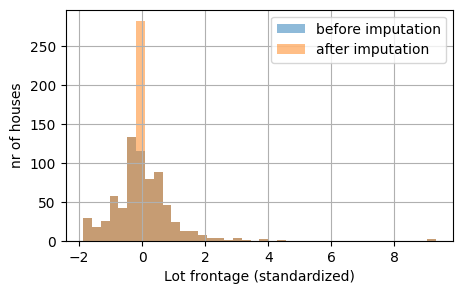

std before imputation: 1.0
std after imputation: 0.8996447802291788


In [11]:
import matplotlib.pyplot as plt

si = SimpleImputer(strategy='mean')
X_lot = si.fit_transform(df_train[['num__LotFrontage']])

plt.figure(figsize=(5,3))
df_train['num__LotFrontage'].hist(bins=40,label = 'before imputation',alpha=0.5)
plt.hist(X_lot,bins=40,label='after imputation',alpha=0.5)
plt.xlabel('Lot frontage (standardized)')
plt.ylabel('nr of houses')
plt.legend()
plt.show()

print('std before imputation:',np.std(df_train['num__LotFrontage']))
print('std after imputation:',np.std(X_lot))

## If your project dataset has missing values...
- handle missing values in categorical and ordinal features as we discussed above
- describe missing values in continuous features
    - how many continuous features contain missing values?
    - what fraction of points contain missing values?
    - what the fraction of missing values in each continuous feature?
- we will cover three advanced methods to handle missing values in continuous features in a few weeks
    - multivariate imputation
    - XGBoost
    - reduced features method (aka the pattern submodel approach)

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>evaluate simple approaches for handling missing values</font>
- **engineer features**
- <font color='LIGHTGRAY'>select features in supervised ML</font>


## Feature engineering

Automatic feature engineering:
- combine features in a simple and automatic way (PolynomialFeatures method in sklearn)
- if n_ftrs << n_points, this can modestly improve the predictive power of your model 

Manual feature engineering:
- difficult, project-specific, and requires domain-knowledge
- it can boost the predictive power of your model!

### Automatic feature engineering

In [12]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(2)
print(poly.fit_transform(X)) # [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2, include_bias=False)
print(poly.fit_transform(X)) # [a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2,interaction_only=True, include_bias=False)
print(poly.fit_transform(X)) # [a, b, ab]

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 0.  1.  0.  0.  1.]
 [ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]]
[[ 0.  1.  0.]
 [ 2.  3.  6.]
 [ 4.  5. 20.]]


In [13]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._polynomial:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Read more in the :ref:`User Guide <polynomial_features>`.
 |  
 |  Parameters
 |  ----------
 |  degree : int or tuple (min_degree, max_degree), default=2
 |      If a single int is given, it specifies the maximal degree of the
 |      polynomial features. If a tuple `(min_degree, max_degree)` is passed,
 |      then `min_degree` is the minimum and `max_degree` is the maximum
 |

### Manual feature engineering

Some advice:
- EDA can give you insights on how you should engineer and preprocess your features better
- normalizing a feature with another feature can often be helpful
   - for example you want to predict who will attend an event
   - two features you have:
      - number of invite emails sent: [10, 20, 10, 20, 5]
      - number of email invites opened: [5, 2, 10, 10, 0]
   - a good new feature could be the fraction of invite emails opened
      - fraction of invite emails opened: [0.5, 0.1, 1, 0.5, 0]
      - person 3 might be more likely to attend than person 2 but that's only obvious from the normalized feature

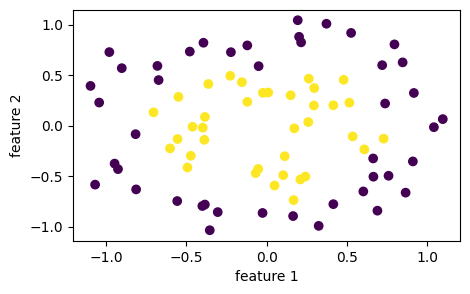

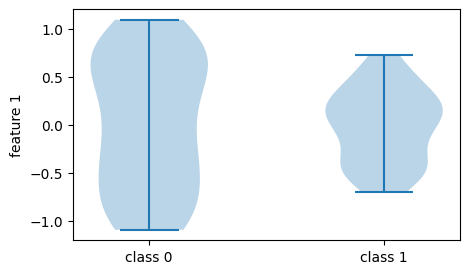

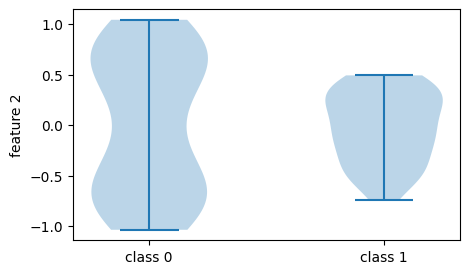

In [15]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.15, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =0)

plt.figure(figsize=(5,3))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

dataset = [X_train[y_train==0,0],
           X_train[y_train==1,0]]

plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['class 0','class 1'])
plt.ylabel('feature 1')
plt.show()


dataset = [X_train[y_train==0,1],
           X_train[y_train==1,1]]

plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['class 0','class 1'])
plt.ylabel('feature 2')
plt.show()



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def simple_ML_pipeline(X_train,X_test,y_train,y_test):
    LR = LogisticRegression() # logistic regression is a simple linear classifier
    LR.fit(X_train,y_train)
    y_test_pred = LR.predict(X_test)
    return accuracy_score(y_test,y_test_pred)
    
test_score = simple_ML_pipeline(X_train,X_test,y_train,y_test)
print(test_score)

0.3


In [17]:
# add new feature
new_feature = np.sqrt(X_train[:,0]**2+X_train[:,1]**2) # the distance from the origin
X_train = np.hstack((X_train,np.expand_dims(new_feature,axis=1)))
print(X_train[:5,:])
new_feature = np.sqrt(X_test[:,0]**2+X_test[:,1]**2)
X_test = np.hstack((X_test,np.expand_dims(new_feature,axis=1)))

[[-0.05045148  0.58776084  0.58992217]
 [-0.54933449  0.28364692  0.61824264]
 [-0.55471872 -0.13344625  0.57054426]
 [-0.90194371  0.56791184  1.06584535]
 [ 0.41429957 -0.77851327  0.88188834]]


In [18]:
test_score = simple_ML_pipeline(X_train,X_test,y_train,y_test)
print(test_score) # the test accuracy improved a lot!

1.0


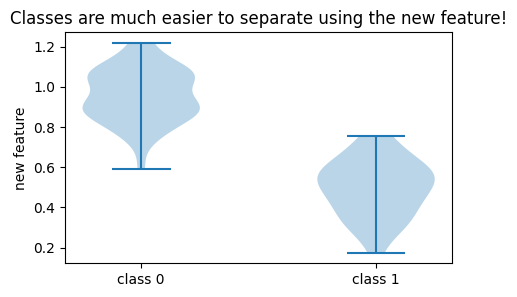

In [19]:
dataset = [X_train[y_train==0,2],
           X_train[y_train==1,2]]

plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['class 0','class 1'])
plt.ylabel('new feature')
plt.title('Classes are much easier to separate using the new feature!')
plt.show()


## Quiz 2

X has three columns: a, b, and c.

```python
X = np.arange(9).reshape(3, 3)

poly = PolynomialFeatures(degree = 2, include_bias = False)
print(poly.fit_transform(X))
```


What will be the shape of the transformed X? Do not run the code. Work the problem out with pen and paper or in your head.

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>evaluate simple approaches for handling missing values</font>
- <font color='LIGHTGRAY'>engineer features</font>
- **select features in supervised ML**


## Feature selection

We cover today how to do feature selection **before** the ML model is trained. We cover later how to select features with ML feature importances.

Necessary if 
- you have too many features: n_ftrs > n_points (some algorithms break down)
- if training an ML algorithm is too computationally expensive using all the features


### Approach

1) You calculate a single number metric between each feature and the target variable **using the training data only**.

- sklearn supported metrics (for both regression and classification)
   - [F test](https://en.wikipedia.org/wiki/F-test) (only measures linear dependency)
   - [mutual information](https://en.wikipedia.org/wiki/Mutual_information) (measures non-linear dependency)
- steps:
   - do you work with a classification or regression problem?
      - regression: 
         - are you interested in linear or non-linear correlations with the target variable?
            - linear: use `sklearn.feature_selection.f_regression`
            - non-linear: use `sklearn.feature_selection.mutual_info_regression`
      - classification:
         - are you interested in linear or non-linear correlations with the target variable?
            - linear: use `sklearn.feature_selection.f_classif`
            - non-linear: use `sklearn.feature_selection.mutual_info_classif`

2) Keep k best features (`sklearn.feature_selection.SelectKBest` method) or keep a certain percentile of the best features (`sklearn.feature_selection.SelectPercentile` method).


#### Pros:
- easy to do
- it is quicker to train ML models with fewer features

#### Cons:
- feature interactions are not taken into account 
   - two features separately are not predictive, but they are predictive together - such effects are ignored!


### Example

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(10)

X = np.random.rand(1000,3)
y = X[:,0] + np.sin(6 * np.pi * X[:,1]) + 0.1 * X[:,2]

f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)
mi = mutual_info_regression(X, y)
print('mi',mi)

f score [107.90134156  53.99212018   0.34354216]
p values [4.52216746e-24 4.18146945e-13 5.57924253e-01]
mi [0.37637501 0.86317726 0.        ]


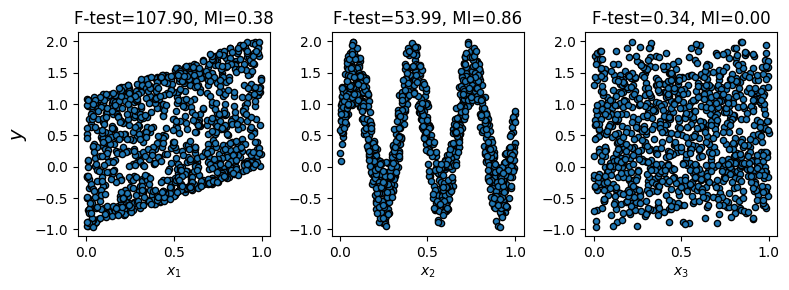

In [21]:
#plt.figure(figsize=(15, 5))
plt.figure(figsize=(8,3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=10)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=12)
plt.tight_layout()
plt.show()

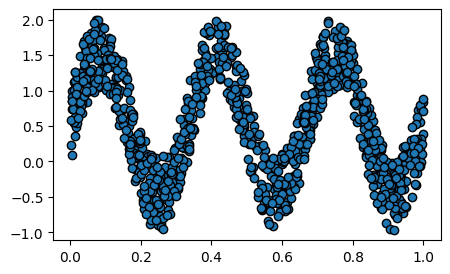

[False  True False]


In [22]:
from sklearn.feature_selection import SelectKBest
f_select = SelectKBest(mutual_info_regression,k=1)
X_f = f_select.fit_transform(X,y)

plt.figure(figsize=(5,3))
plt.scatter(X_f,y,edgecolor='k')
plt.show()
# the features selected:
print(f_select.get_support())

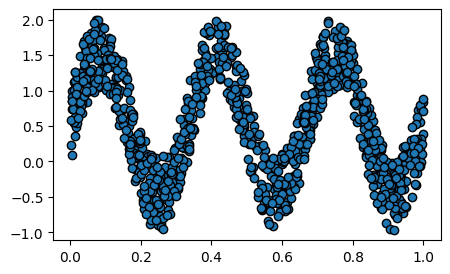

array([False,  True, False])

In [23]:
from sklearn.feature_selection import SelectPercentile
f_selector = SelectPercentile(mutual_info_regression,percentile=33)
X_mi = f_selector.fit_transform(X,y)

plt.figure(figsize=(5,3))
plt.scatter(X_mi,y,edgecolor='k')
plt.show()
# features selected
f_selector.get_support()

### Be careful though!

In [24]:
# toy data
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
np.random.seed(0)

X = np.random.uniform(size=(1000,2)) 

y = np.zeros(1000)
y[(X[:,0]>=0.5)&(X[:,1]<0.5)] = 1
y[(X[:,0]<=0.5)&(X[:,1]>0.5)] = 1

In [25]:
f_test, p_values = f_classif(X, y)
print('f score',f_test)
print('p values',p_values)

mi = mutual_info_classif(X, y)
print('mi',mi)

f score [0.28282382 0.82026181]
p values [0.59497468 0.36532223]
mi [0.00338502 0.00055867]


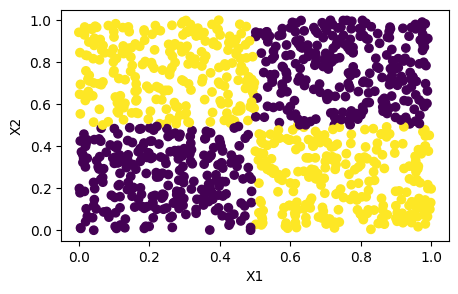

In [26]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Mudcard